# Methodology

The approach we adopted for the analysis of this dataset follows a standard methodology used by machine learning scientist. We first begin by looking at the data, from a descriptive statistics perspective, then we try to visialize the dataset in order to have a general idea.

In order to apply any machine learning algorithm, we need to transform the data into a format that will minimize the error propagation due to the difference in the way different features were measured and reported. We apply several techniques like rescaling and normalization. This step is necessary to make sure our odels are accurate and generalizable.

We then need to take a look at our features one by one. We need to know what feature combination impact the most the performance of our models. TO do that, several techniques for feature selection exist, and we will apply some of them to our dataset in order to pick the most important ones to use in our models.

We will mainly be doing classification in this dataset, but we might do some regression as well. We will be applying different approaches to our data and measure the accuracy of our models to pick the winning solution.

The general approach in this notebook is summarized in the figure below:

![approach](./images/approach/approach.001.png)  

After looking at the data sent by Kollmann's lab members, I decided to go with the vertical dataset for the reasons below :

- The horizontal dataset represents data points per mouse (rows) and visits (columns). THis is an interesting view of the experiment and the most obvious way to describe the visits and the observations, unfortunately, reducing the number of instances (rows) to a row per mouse, reduces the size of the dataset to be used by some classification algorithm, which will lead to models that are not generalizable
- Some data points were not entered and are missing. Usually when these missing values are rare in a dataset, one common approach will be the imputation of the missing values by using the average or the median values. But if these missing values are a big part of the dataset, the best approach to deal with them is to simply remove all the rows containing missing data. With the horizontal data set we might end up removing a lot of data which doesn't help.
- Assuming all visits in the vertical dataset are independent (which is not necessarily true), we can have a dataset with a decent size that can be used to split the dataset later into training/testing/validation datasets, or to do k-fold cross validation on some classification tasks

# Analysis Environment 

This analysis was done using open source tools mainly.

- [Python Anaconda](https://www.continuum.io/downloads)
- [Jupyter Notebook](http://jupyter.org/)

I also used [Tableau free edition](http://www.tableau.com/) for some visualizations.

# Vertical Dataset No BCG (all time points)

## Understand the data : Descriptive Statistics

Let's start first by importing all libraries we need for the analysis, for reading the files, creating plots, performaing machine learning data analysis etc ..

In [20]:
%matplotlib inline
# Load libraries
import numpy as np
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from string import letters
sns.set(style="white")
plt.rcParams['figure.figsize'] = (20.0, 10.0)


We start by loading the dataset into a **pandas dataframe**. This is the most efficient way to manipulate and transform the data 

In [6]:
# Load the data set into a dataframe
df = pd.read_csv('../data/excel_updates_danny/cs.mortality.vertical.full.nobcg.leftvright.matrix.csv')


In [9]:
# Print dataset
df.shape

(585, 44)

We have a dataset with 585 instances and 44 features
Let's take a look at the types of each attribute

In [13]:
# Print data types for attributes

pandas.set_option('display.max_rows', 600)
df.dtypes

pupID                                          object
litter                                          int64
sex                                            object
outcome                                        object
challenge.time                                 object
weight.challenge                              float64
weight                                        float64
ch.weight                                     float64
pch.weight                                    float64
time                                           object
hr.post.challenge                             float64
visit                                          object
score.overall                                  object
score.left                                     object
score.right                                    object
rights.mobile.overall                           int64
rights.shakey.overall                           int64
rights.lethargic.overall                        int64
rights.nonmobile.overall    

Let's take a look at the 20 first rows of the dataset

In [12]:
#print first 20 rows
df.head(20)

,pupID,litter,sex,outcome,challenge.time,weight.challenge,weight,ch.weight,pch.weight,time,...,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead,observations
0,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


As we can see a lot of data is missing, we will deal with this later in our analysis
For now let's summarize the distribution of each attribute, not all of this is informative, as some text data is transformed automatically into numerical data, but we are more interested in the distribution of the attributes (features)

In [15]:
pandas.set_option('precision', 3)
df.describe()

,litter,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,rights.mobile.overall,rights.shakey.overall,rights.lethargic.overall,rights.nonmobile.overall,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead
count,585.000,553.000,406.000,406.000,406.000,585.000,585.000,585.000,585.000,585.000,...,532.000,532.000,532.000,532.000,532.000,532.000,532.000,532.000,532.000,585.000
mean,11.191,4.302,4.123,-0.053,-0.829,33.096,0.256,0.099,0.229,0.051,...,0.244,0.117,0.250,0.086,0.064,0.107,0.085,0.011,0.060,0.034
std,6.634,0.748,0.690,0.352,8.527,20.112,0.437,0.299,0.421,0.221,...,0.430,0.321,0.433,0.281,0.245,0.310,0.279,0.106,0.238,0.182
min,1.000,2.510,2.430,-1.960,-35.701,12.083,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,NaN,NaN,NaN,NaN,18.167,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
50%,12.000,NaN,NaN,NaN,NaN,25.333,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
75%,17.000,NaN,NaN,NaN,NaN,42.417,1.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
max,25.000,5.930,5.930,0.890,32.271,96.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The most important thing we want to see here prior to starting any analysis is how balanced this dataset is, so we will try to take a look at the dsitribution of the outcome, which is the class we want to predict with the score

In [17]:
# class distribution
df.groupby('outcome').size()

outcome
die           160
found.dead     93
live          332
dtype: int64

As we can see the class `live` is higher than the two other, but when we merge `found.dead` with `die` we can have a dataset that is more or less balanced. That said this is a general observation, things can change later when we transform the data.

## Understand the data : Visualization

### Unimodal Data Visualization

Let's look at how the data looks like before any transformation. It is always useful to lok how different attributes are distributed. 

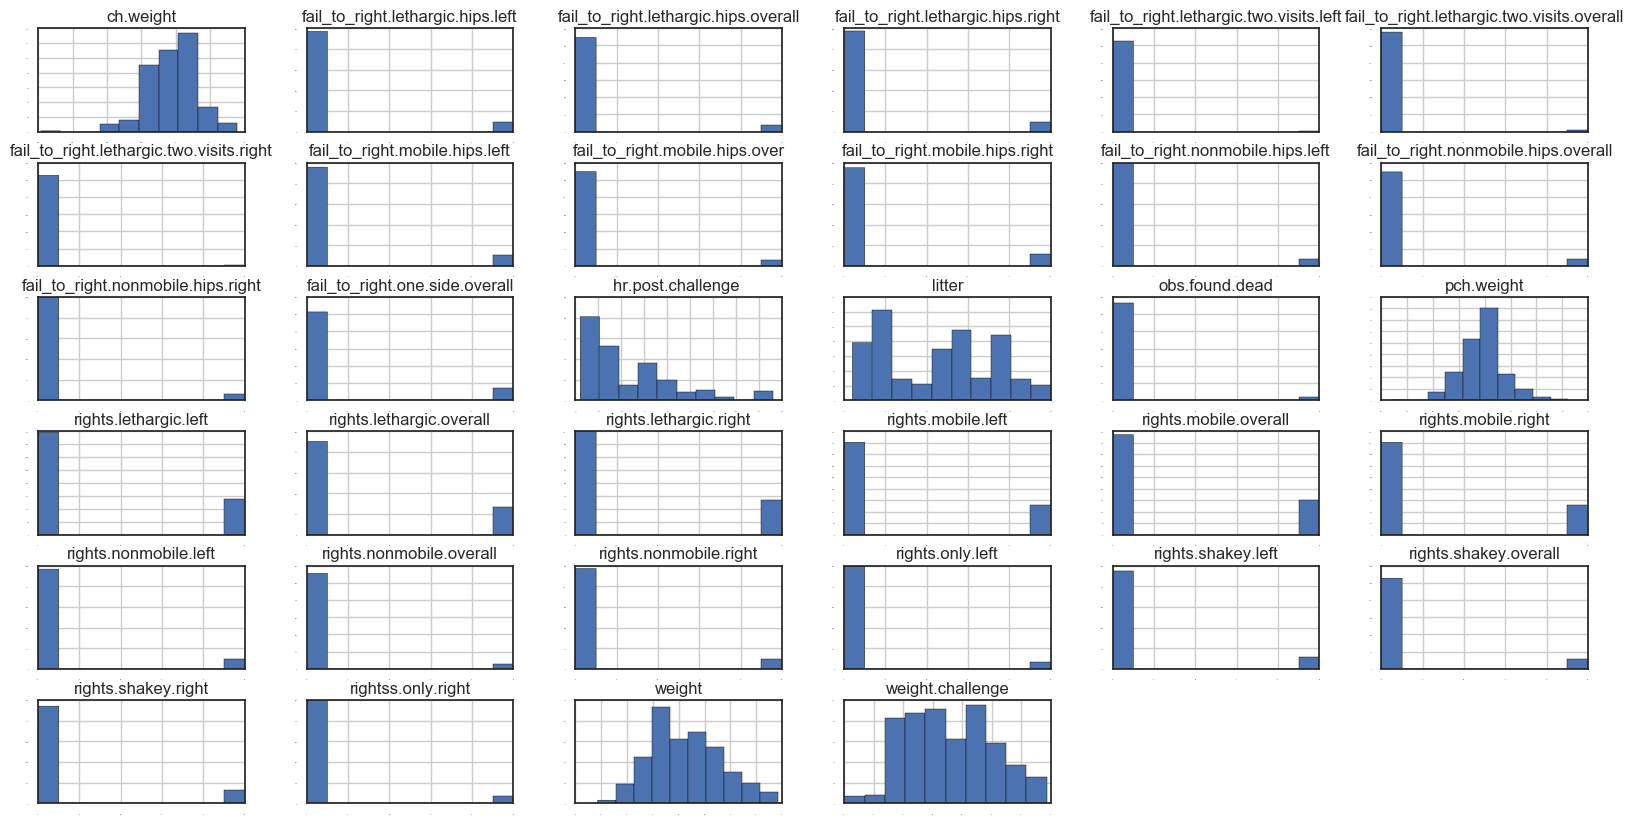

In [21]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

Because we have a lot of features that are 0/1 we don't get much out of this plot, except that all features/attributes related to `weight` seem to have a gaussian like distribution

### Multimodal Data Visualization

Let's see if we have attributes that correlate

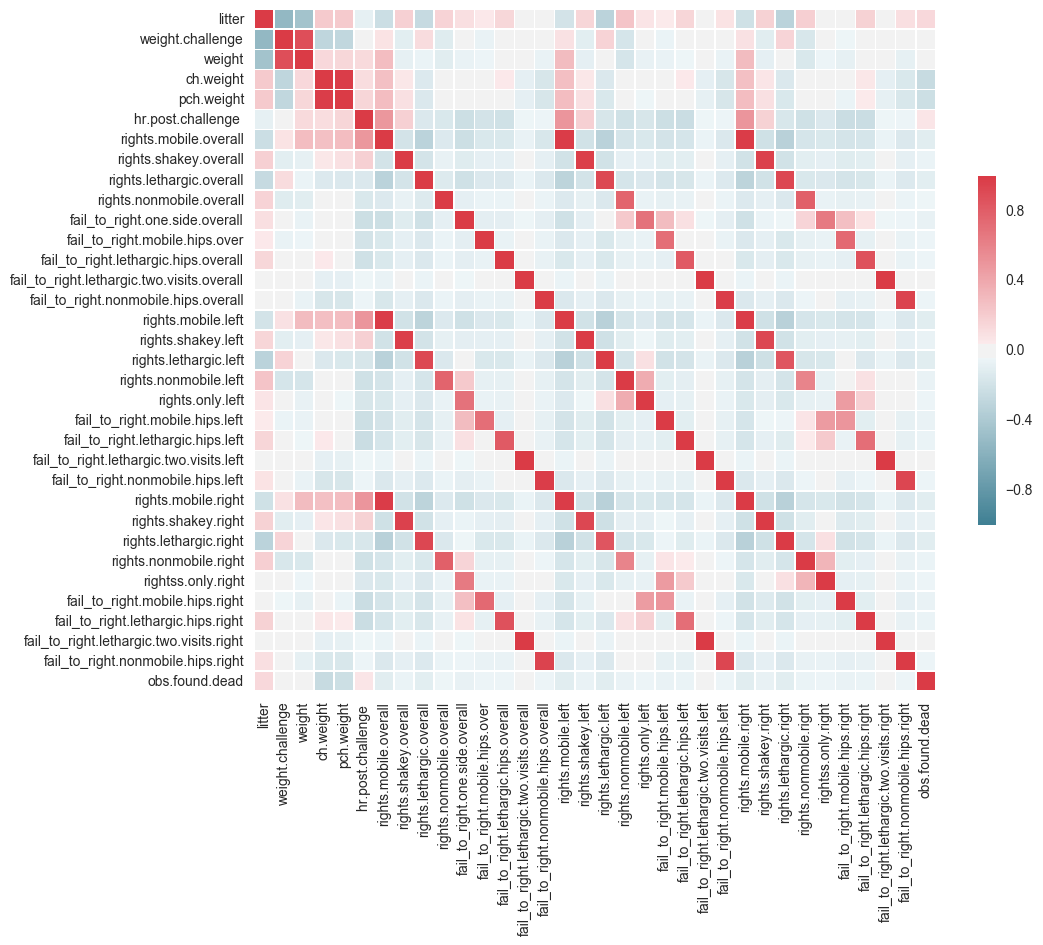

In [26]:
correlations = df.corr(method='pearson')
correlations

# Plot Correlations
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

As we can see we have a lot of diagonals in this dataset, which means not all these features are going to be included in the dataset as we have a lot of correlation

We can already spot some positive correlation between the weight and the hours post challenges even if it is a slightly positive (not a strong correlation judging by the colors).

The top left corner seems to have some useful information

Not all the algorithms deal with correlated features equally. Some algorithms like Naive Bayes assumes attributes independence, so it may behaves in an unexpected way, some other approaches like Support Vector Machines care about it much less.

One thing we can do here, is to take the decision to reduce the number of attributes by removing some of the features reported by the parallel red dots on this correaltion matrix

Let's try to remove all the *_overall_* feautres and keep just the rights and lefts and see how the new correlation will look like



In [28]:
list(df)
df_clean = df.drop(['rights.mobile.overall', 'rights.shakey.overall', 'rights.lethargic.overall', 'rights.nonmobile.overall', 'fail_to_right.one.side.overall', 'fail_to_right.mobile.hips.over', 'fail_to_right.lethargic.hips.overall', 'fail_to_right.lethargic.two.visits.overall', 'fail_to_right.nonmobile.hips.overall'
], axis=1)


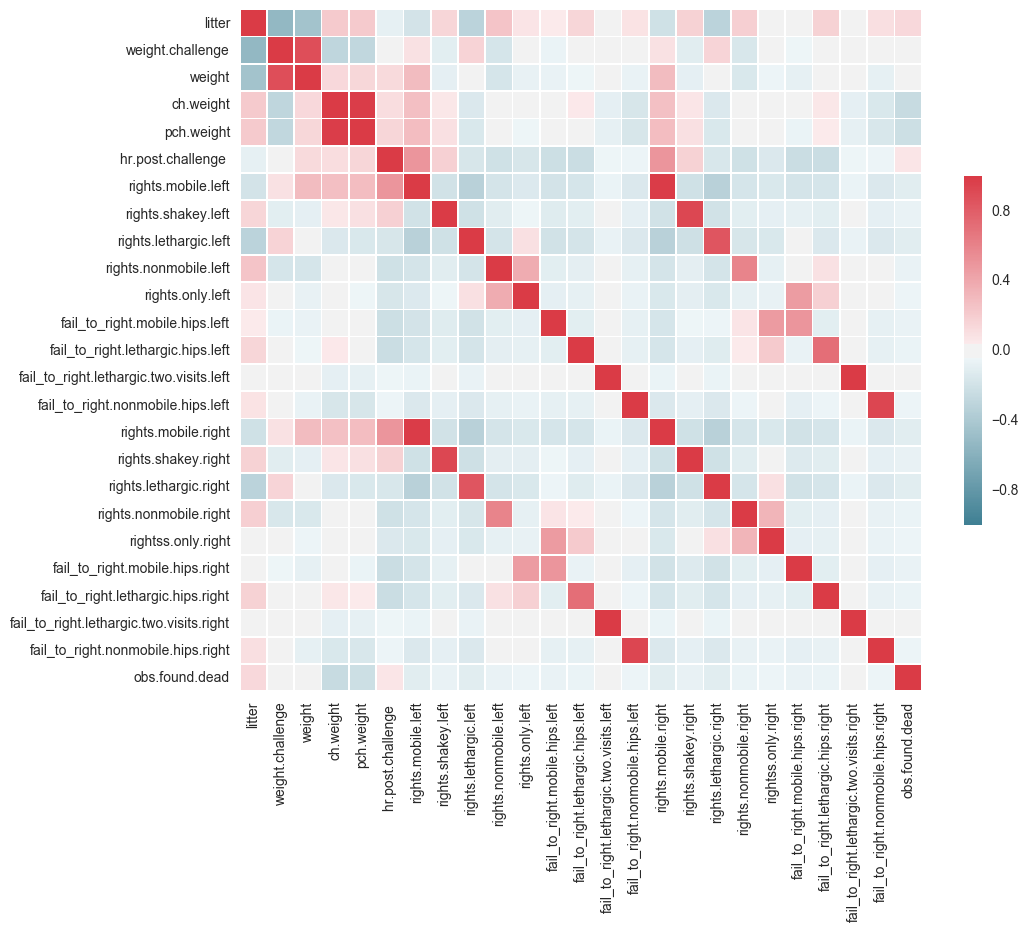

In [30]:
correlations = df_clean.corr(method='pearson')
correlations

# Plot Correlations
corr = df_clean.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)